# Exercise set 5


>The first goal of this exercise is to perform
>**least squares regression** for a case where we have
>**correlations** between variables. We will also see how
>we can use a **training set** and a **test set** to
>assess the quality of a model.
>
>The second goal of this exercise is to analyze the results from a experimental
>design. After this exercise, you should have gained familiarity
>with a full fractional factorial design and know how to calculate
>effects.

## Exercise 5.1 

In this exercise, we will make a least squares model for a case where we have several
variables which may be correlated.
The file [bloodpress.txt](Data/bloodpress.txt) ('Data/bloodpress.txt') contains data about 20 individuals with high blood pressure.
The data columns present in the file are given in Table 1.


| Column | Description              |             Unit |
|:-------|:-------------------------|-----------------:|
| PT     | Label for person         |              --- |
| BP     | Blood pressure           |             mmHg |
| Age    | Age                      |            years |
| Weight | Weight                   |               kg |
| BSA    | Body surface area        |            m$^2$ |
| DUR    | Duration of hypertension |            years |
| Pulse  | Basal heart rate         | beats per minute |
| Stress | Stress index             |              --- |
||**Table 1:** *Data columns present in the file [bloodpress.txt](Data/bloodpress.txt)*|


**(a)** Begin by exploring the data. Plot pairs of variables against each other
to visually inspect which variables might be correlated. Based on your plots, which pairs
of variables seem to be correlated? Hint: The [scatter plot matrix](https://seaborn.pydata.org/examples/scatterplot_matrix.html) from [seaborn](https://seaborn.pydata.org/index.html) might help with these plots.

In [1]:
import pandas as pd # To read the data
import matplotlib.pyplot as plt # For plotting
from matplotlib.gridspec import GridSpec # For making a plotting grid
from scipy.stats import pearsonr
from itertools import combinations, product # For combinations and Cartesian products
from math import ceil # To round to the higer integer
import numpy as np #For matrix manipulation
import seaborn as sns

In [2]:
data = pd.read_csv('Data/bloodpress.txt', delim_whitespace=True)
data.drop(columns=['Pt'], inplace=True)  # We don't need the Pt column
data.describe()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,114.000000,48.600000,93.090000,1.998000,6.430000,69.600000,53.35000
std,5.428967,2.500526,4.294905,0.136482,2.145276,3.803046,37.08635
min,105.000000,45.000000,85.400000,1.750000,2.500000,62.000000,8.00000
25%,110.000000,47.000000,90.225000,1.897500,5.250000,67.750000,17.00000
50%,114.000000,48.500000,94.150000,1.980000,6.000000,70.000000,44.50000
75%,116.250000,49.250000,94.850000,2.075000,7.600000,72.000000,95.00000
max,125.000000,56.000000,101.300000,2.250000,10.200000,76.000000,99.00000


In [3]:
def add_correlation_coefficient(x, y, ax=None, **kwargs):
    """Print correlation coefficient and p value in a pairplot."""
    rho, pval = pearsonr(x, y)
    ax = ax or plt.gca()
    if pval < 0.05:
        ax.annotate(
            f'ρ = {rho:.2g}*',
            xy=(.1, .9),
            xycoords=ax.transAxes,
            fontsize='large'
        )
    else:
        ax.annotate(
            f'ρ = {rho:.2g}',
            xy=(.1, .9),
            xycoords=ax.transAxes,
            fontsize='large'
        )

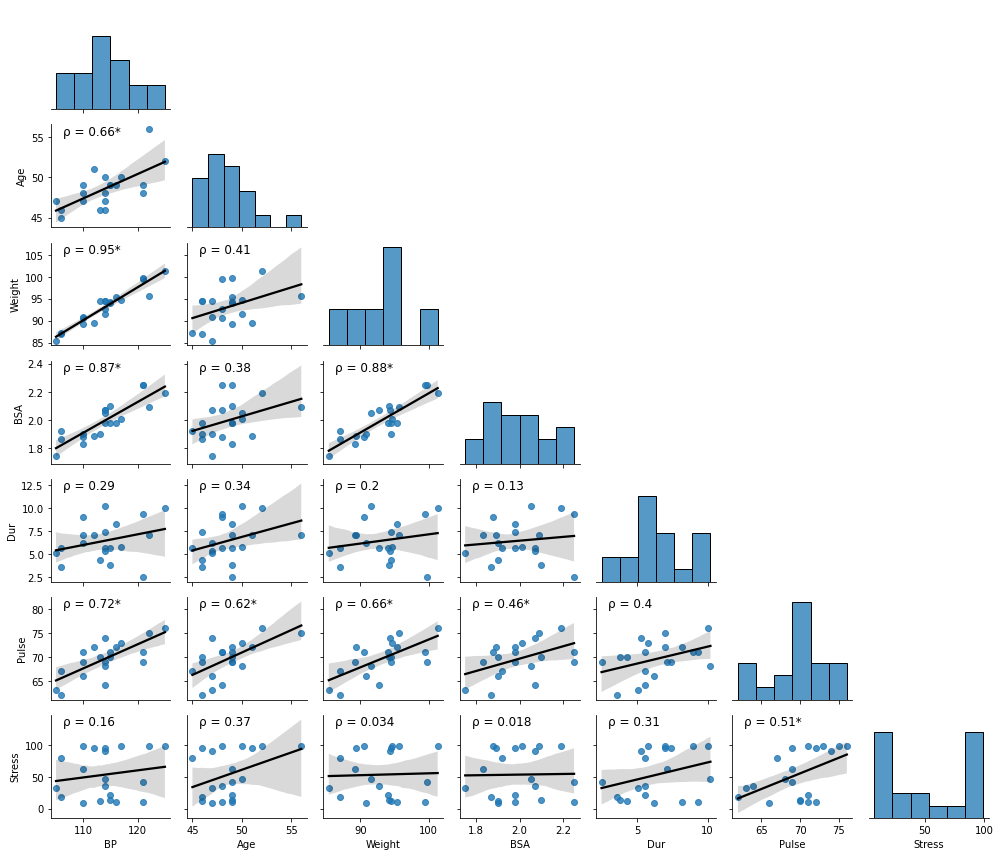

In [4]:
# Make a Scatter Plot Matrix
grid = sns.pairplot(
    data,
    kind='reg',
    corner=True,
    plot_kws={'line_kws': {'color': 'k'}},
)
grid.fig.set_size_inches(14, 12)
grid.map_lower(add_correlation_coefficient)
grid.fig.tight_layout()

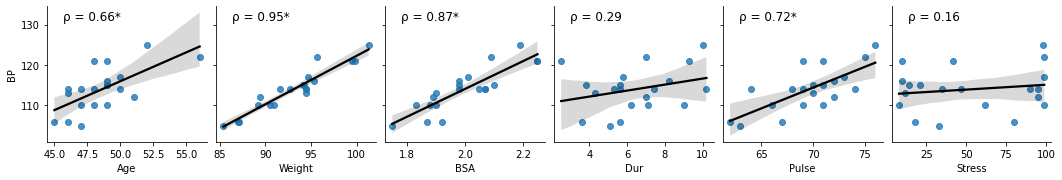

In [5]:
# Just plot the blood pressure vs. the other variables:
grid2 = sns.pairplot(
    data,
    kind='reg',
    plot_kws={'line_kws': {'color': 'k'}},
    y_vars=['BP'],
    x_vars=[i for i in data.columns if i != 'BP'],
)
grid2.map(add_correlation_coefficient)

**Your answer to 5.1(a):** 
- BP with Age,
- BP with Weight,
- BP with BSA, 
- BP with Pulse, 
- Pulse with Age, 
- Pulse with Weight, 
- Weight with BSA

**(b)** To quantitatively investigate possible correlations, we can calculate
the [Pearson correlation
coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ($\rho_{X,Y}$),

\begin{equation*}
\rho_{X,Y} = \frac{\mathrm{cov}(X,Y)}{S_X S_Y},
\end{equation*}

where $\mathrm{cov}(X,Y)$ is the covariance between the variables $X$ and $Y$, and
$S_i$ is the estimated standard deviation for variable $i$.
In `scipy`, this coefficient is a part of the [stats package](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) 
and can be imported by:
```Python
from scipy.stats import pearsonr
```
This function returns two values:
 * The correlation coefficient itself. It is close to $1$ for positively correlated distributions
   and close to $-1$ for negatively correlated distributions.
 * A "p-value" which (to quote the documentation of `scipy`):

> roughly indicates the probability of an uncorrelated system
> producing datasets that have a Pearson correlation at least as extreme
> as the one computed from these datasets.


Calculate this coefficient for each of the pairs of variables and
use it to judge if the variables
are correlated. Note: You can also create a heat map of correlations to visualize them.
This can be done with the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
method from [seaborn](https://seaborn.pydata.org/index.html) in combination
with the [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
method from [pandas](https://pandas.pydata.org/docs/index.html).

In [6]:
for pair in combinations(data.columns, 2):
        # Get the data
        yname = pair[0]
        xname = pair[1]
        ydata = data[yname]
        xdata = data[xname]
        # Calculate the pearson coefficient
        corr, p = pearsonr(x=xdata, y=ydata)
        if abs(corr) >= .6: # If the coefficient is greater than 0.6 or smaller than -0.6 we want to know it
            print(f"{xname} and {yname}; {corr:.2g}")

Age and BP; 0.66
Weight and BP; 0.95
BSA and BP; 0.87
Pulse and BP; 0.72
Pulse and Age; 0.62
BSA and Weight; 0.88
Pulse and Weight; 0.66


In [7]:
# Pandas also has a convenience function for this
corr = data.corr()
corr.style.background_gradient(cmap='viridis')

,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


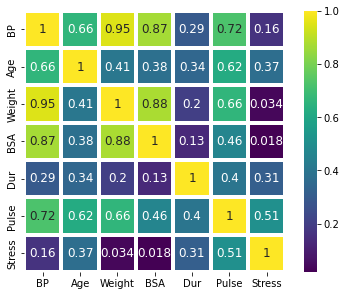

In [8]:
# Same table, but with seaborn:
fig, ax = plt.subplots(constrained_layout=True)
sns.heatmap(
    data.corr(),
    cmap='viridis',
    annot=True,
    ax=ax,
    annot_kws={'size': 'large'},
    linewidths=4,
    square=True,
);

**Your answer to 5.1(b):** Same answer as we determined by *hand*.

**(c)** Create a linear model in which you predict the blood pressure ($y$) from
all 6 available variables (Age, Weight, BSA, DUR, Pulse, and Stress).
For this, make use of the `statsmodels` package and the
ordinary least squares (OLS) estimation. (For an example of the usage, see: [here](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html))
It might be beneficial to scale your variables so that they have a
mean of $0$ and a variance of $1$. This can, for instance, be done using the
[scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html)
method from [sklearn](https://scikit-learn.org/stable/).

**Note:** One motivation for using the `statsmodels` package is that it will do
some additional statistics in connection with the fitting. To print out
the results of a fitting, we can do the following:

```Python
import statsmodels.api as sm
# load X data...
# load y data...
# Do fitting:
model = sm.OLS(y, X).fit()
# Print out statistics:
print(model.summary())
```

Some information on the interpretation of this summary can be found [here](https://blog.datarobot.com/ordinary-least-squares-in-python).

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     560.6
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           6.40e-15
Time:                        17:36:09   Log-Likelihood:                -6.1033
No. Observations:                  20   AIC:                             26.21
Df Residuals:                      13   BIC:                             33.18
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.8705      2.557     -5.034      0.0

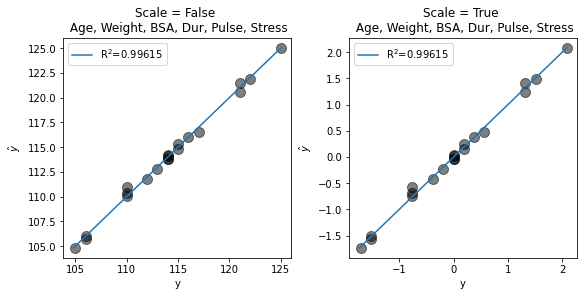

In [9]:
def linear_fit(data, yvar, xvars, scale_data=False, add_constant=False,
               axi=None):
    """Do a linear fitting, based on the OLS example of statsmodels.

    Parameters
    ----------
    data : pandas data frame
        The raw data to use in the blotting.
    yvar : string
        The label used to select the y-variable.
    xvars : list of strings
        The label(s) used to select the x-variables.
    scale_data : boolean, optional
        If True, the data will be scaled to have a mean of 0 and
        a variance of 1.
    add_constant : boolean, optional
        If True, we will add a constant (intercept) to the x-data.
    axi : matplotlib.axis, optional
        If given, we will plot in this axis. Otherwise a new axis
        will be created.

    """
    import statsmodels.api as sm
    from sklearn.preprocessing import scale
    X = data[xvars]
    y = data[yvar]
    if scale_data:
        X = scale(X)
        y = scale(y)
    if add_constant:
        X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    yre = model.predict(X)
    print(model.summary())
    # Plot predicted y vs the real y to visualize the results:
    miny = min(min(y), min(yre))
    maxy = max(max(y), max(yre))
    lines = [
        {
            'x': [miny, maxy],
            'y': [miny, maxy],
            'label': rf'$R^2$ = {model.rsquared:6.4f}',
        }
    ]
    ax = axi
    ax.scatter(y, yre, c='k', alpha=.5, s=100) # Plot the data
    ax.set_xlabel("y") # Set the axis labels
    ax.set_ylabel(r"$\hat{y}$")
    ax.set_title(f"Scale = {scale_data} \n {', '.join(xvars)}")
    ax.plot([miny, maxy], [miny, maxy], label=rf"R$^2$={model.rsquared:.5f}") # Plot a visual aid to the lower left data point and upper right
    ax.legend()

fig, axs = plt.subplots(constrained_layout=True, ncols=2, figsize=(8,4))
for axi, scale in zip(axs, [False, True]):
    linear_fit(data, yvar="BP", xvars=[i for i in data.columns if i != "BP"],
               scale_data=scale, axi=axi, add_constant=not scale)

**Your answer to 5.1(c):**

In both cases (with or without scaling) the least-squares solution is found successfully. Results of the scaled data is shown in this table:

|**Variable**|**Coefficient**|**p-value**            |
|:-----------|:-------------:|:---------------------:|
| Age        |        0.3239 |                 0.000 |
| Weight     |        0.7673 |                 0.000 |
| BSA        |        0.0949 |                 0.026 |
| Dur        |        0.0270 |                 0.165 |
| Pulse      |       -0.0592 |                 0.111 |
| Stress     |        0.0381 |                 0.112 |

| |
|:---|
|**Table 1:** Coefficients when fitting with age, weight, body surface area, duration, heart rate and stress. The p-value tests the null-hypothesis that the coefficient is zero. If this is less than the confidence level (default: $0.05$) we expect the coefficient to be different from zero, and that there is a statistically significant relationship between the variable and the response.|

These results indicate that the age, weight and body surface area are the most
important variables. However, since we have seen that the body surface area is correlated
with the weight, we expect that this variable can be removed from the fitting (as we will
do in the next step).

In the case without scaling the following
warning is issued by `statsmodels`:

>The condition number is large, 2.23e+03. This might indicate that there are
>strong multicollinearity or other numerical problems.

Warnings of this kind typically indicate two things (as the warning says):

**i)** That some of the `x`-variables are correlated. One should then
investigate what variables are correlated and reduce the number of
variables so that our set of `x`-variables are uncorrelated.

**ii)** That there are numerical issues related to finding the least squares
solutions. In general, it is hard to identify the root cause of this, but in
many cases the situation can be improved by scaling the variables so that their
numerical values are of the same order.
This is important if our variables have very different units or
meanings.

**(d)** Your results so far should indicate that some of the variables
are correlated. Create a new model where you remove variables
that are correlated. That is, if a variable, say $u$, is correlated with
another variable, say $v$, pick either $u$ or $v$ for your new model.

1. Fit your new model to the blood pressure data
   and compare it with the model where you included all variables.
2. How many variables can you remove and still get a good model?
3. Which variables seem
   to be more important for predicting if a person will have high blood pressure?

                            OLS Regression Results                            
Dep. Variable:                     BP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     600.2
Date:                Sat, 12 Feb 2022   Prob (F-statistic):           8.24e-16
Time:                        17:36:10   Log-Likelihood:                -7.9776
No. Observations:                  20   AIC:                             27.96
Df Residuals:                      14   BIC:                             33.93
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.5874      2.699     -4.663      0.0

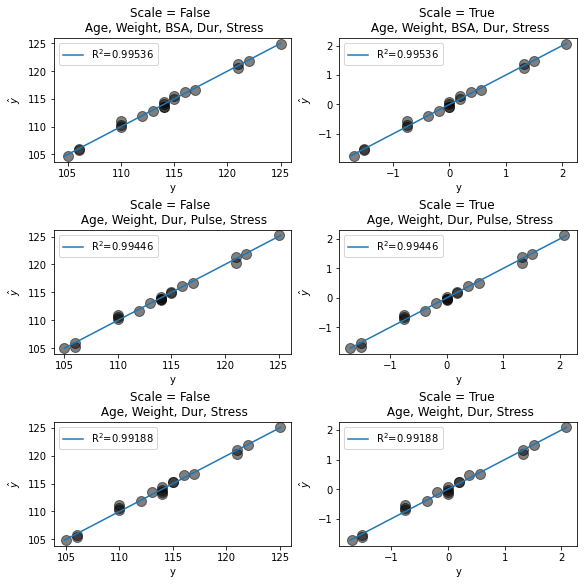

In [10]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8,8), constrained_layout=True)
axs = axs.flatten()
# Exclude BP and Pulse and BSA as they are correlated with weight
new_exc = [("BP", "Pulse"), ("BP", "BSA"), ("BP", "Pulse", "BSA")]
# Make a list of the product of the two lists ([a,b],[c,d])=>[(a,c), (a,d), (b,c), (b,d)]:
prod = product(new_exc, [False, True]) 
for axi, (exc, scale) in zip(axs, prod):
    linear_fit(data, yvar="BP", xvars=[i for i in data.columns if i not in exc],
               scale_data=scale, axi=axi, add_constant=not scale)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.434
Model:                            OLS   Adj. R-squared (uncentered):              0.405
Method:                 Least Squares   F-statistic:                              14.59
Date:                Sat, 12 Feb 2022   Prob (F-statistic):                     0.00116
Time:                        17:36:11   Log-Likelihood:                         -22.680
No. Observations:                  20   AIC:                                      47.36
Df Residuals:                      19   BIC:                                      48.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

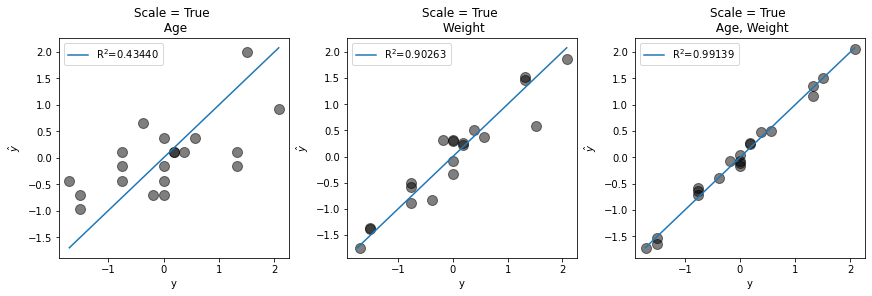

In [11]:
# Now we just use the most important ones
fig, axs = plt.subplots(ncols=3, figsize=(12,4), constrained_layout=True)
age = ["Age"]
weight = ["Weight"]
both = age + weight
for axi, inc  in zip(axs, [age, weight, both]):
    linear_fit(
        data,
        yvar="BP",
        xvars=[i for i in data.columns if i in inc],
        scale_data=True,
        axi=axi
    )

**Your answer to 5.1(d):** We have removed:
 - The body surface area as it is correlated with the weight.
 - The heart rate as it is also correlated with the weight.
 
This leaves four
variables: age, weight, duration and stress, and the results of the fitting
can be found in the figure above.

The results from the fitting (the coefficients, see Table 2)
indicates that age and weight are more important than the other variables.


|**Variable**|**Coefficient**|**p-value**            |
|:-----------|:-------------:|:---------------------:|
| Age        |        0.3149 |                 0.000 |
| Weight     |        0.8181 |                 0.000 |
| Dur        |        0.0158 |                 0.532 |
| Stress     |        0.0149 |                 0.560 |

| |
|:---|
|**Table 2:** Coefficients when fitting with age, weight, duration, and stress. The p-value tests the null-hypothesis that the coefficient is zero. If this is less than the confidence level (default: $0.05$) we expect the coefficient to be different from zero, and that there is a statistically significant relationship between the variable and the response.|

Thus, we can try to make a new model where we use just two variables: age and weight. As shown above,
these results show that we can largely predict the blood pressure using the age and weight, or just the
weight alone.

**(e)** One strategy to assess the quality of a model is to split the raw data
into a **training set** and a **test set**. Then the **training set**
is used to fit the data and the **test set** is used to test the quality of
the model.

Consider a data set containing $n$ samples. If the data set is
relatively small, we can use the "Leave-one-out cross-validation (LOOCV)"
approach. Here, we pick one sample, say measurement number $j$, which we
keep out of the fitting and we fit the model using the $n-1$ other points.
Now, we can *predict* the value of measurement $j$ using the fitted model,
let us call the predicted value $\tilde{y}_j$. The difference between the predicted
value from the model and the measured value $y_j$ can then be taken as a measure
of the error,

\begin{equation*}
r_j = y_{j} - \tilde{y}_j,
\end{equation*}

where $r_j$ is the so-called predicted residual.
There is nothing special about picking point $j$, and we can try all possibilities
of leaving one point out, and refitting the model using the remaining $n-1$
measurements. After doing this for all possibilities, we have fitted the model
$n$ times and the mean squared error (obtained from the squared
residuals), $\mathrm{MSE}_{\mathrm{CV}}$, can then be used
to estimate the error in the model,

\begin{equation*}
\mathrm{MSE}_{\mathrm{CV}} = \frac{1}{n} \sum_{i=1}^{n} r_i^2 =  \frac{1}{n} \sum_{i=1}^{n} (y_i - \tilde{y}_i)^2,
\end{equation*}

where $y_i$ is the measured $y$ in experiment $i$, and $\tilde{y}_i$ is the
predicted $y$, using a model which was fitted using all point *except* $y_i$.

1. Implement the LOOCV approach and calculate the mean squared error for a linear fit
   using all variables, and for a linear fit using just the weight and age as
   variables.

   **Hint:** The splitting into training and test sets can be done with the method
   [LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)
   from [sklearn](https://scikit-learn.org/stable/):

   ```Python
   from sklearn.model_selection import LeaveOneOut
   # load X data...
   # load y data...
   loo = LeaveOneOut()
   for train_index, test_index in loo.split(X):
       X_train, X_test = X[train_index], X[test_index]
       y_train, y_test = y[train_index], y[test_index]
       # Do fitting using X_train and y_train.
       # Calculate error using y_test and predicted y from the model.
   ```

2. One can show that for polynomial fitting, the mean squared error can
   be obtained in a simpler way,

   \begin{equation*}
   \mathrm{MSE}_{\mathrm{CV}} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \tilde{y}_i)^2 =
   \frac{1}{n}\sum_{i=1}^{m} \left(\frac{y_i - \hat{y}_i}{1 - h_{ii}} \right)^2,
   \end{equation*}

   where the $\hat{y}_i$'s are predicted values using the
   model fitted with *all data points*,
   and $h_{ii}$ is the $i$'th diagonal element of the
   $\mathbf{H}$ matrix (the projection matrix,
   see Eq. (2) in exercise 3),
   
   \begin{equation}
   \mathbf{H} =
   \mathbf{X} 
   \left( 
     \mathbf{X}^\mathrm{T} \mathbf{X}
   \right)^{-1}
   \mathbf{X}^\mathrm{T} = \mathbf{X} \mathbf{X}^+
   \end{equation}

   Using the equations given above, recalculate $\mathrm{MSE}_{\mathrm{CV}}$ and compare
   with your previous answers.

   Note the difference between $\hat{y}_i$ and $\tilde{y}_i$, and the
   fact that we actually don't have to do the
   refitting(!) in order to obtain the $\mathrm{MSE}_{\mathrm{CV}}$.

In [12]:
import statsmodels.api as sm
from sklearn.preprocessing import scale
def loo_fit(data, yvar, xvars, scale_data=False, add_constant=False,
               axi=None):
    """Do a linear fitting, based on the OLS example of statsmodels.

    Parameters
    ----------
    data : pandas data frame
        The raw data to use in the blotting.
    yvar : string
        The label used to select the y-variable.
    xvars : list of strings
        The label(s) used to select the x-variables.
    scale_data : boolean, optional
        If True, the data will be scaled to have a mean of 0 and
        a variance of 1.
    add_constant : boolean, optional
        If True, we will add a constant (intercept) to the x-data.
    axi : matplotlib.axis, optional
        If given, we will plot in this axis. Otherwise a new axis
        will be created.

    """
    import statsmodels.api as sm
    from sklearn.preprocessing import scale
    from sklearn.model_selection import LeaveOneOut
    loo = LeaveOneOut()
    X = data[xvars]
    y = data[yvar]
    err = []
    if scale_data:
        X = scale(X)
        y = scale(y)
    if add_constant:
        X = sm.add_constant(X)
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model = sm.OLS(y_train, X_train).fit()
        yre = model.predict(X_test)
        er = (y_test-yre)**2
        err.append(er)
    print("\t- MSE with " + ", ".join(xvars)+f": {np.average(err):.5f}")

var_all = [i for i in data.columns if i not in ["BP"]]
var_wa = ["Weight", "Age"]
print("LOO")
for var in [var_all, var_wa]:
    loo_fit(data, yvar="BP", xvars=var,
            scale_data=True)

print("Matrix equation:")
for var in [var_all, var_wa]:
    X = data[var] # Select xvar
    y = data['BP'] # Select yvar
    X = scale(X)
    y = scale(y)
    y_hat = sm.OLS(y, X).fit().predict(X) # Calculate yhat
    H = X @ np.linalg.pinv(X)
    h = np.diagonal(H) # Take diagonal of H
    mse = np.average(((y - y_hat)/(1.0 - h))**2)
    print("\t- MSE with " + ", ".join(var)+f": {mse:.5f}")

LOO
	- MSE with Age, Weight, BSA, Dur, Pulse, Stress: 0.00786
	- MSE with Weight, Age: 0.00996
Matrix equation:
	- MSE with Age, Weight, BSA, Dur, Pulse, Stress: 0.00786
	- MSE with Weight, Age: 0.00996


**Your answer to 5.1(e):** The error from leaving one out is $0.00786$ and $0.00996$, respectively, for the two cases.
We see that the error is not increased a lot when we reduce the number of variables significantly.

Using the alternative formula, the errors are still $0.00786$ and $0.00996$.

## Exercise 5.2

The growth rate of a certain bacterium specie depends
on the concentration of nutrients such as phosphate,
sucrose, and nitrate. We have conducted a set of
experiments where we have investigated how the
growth is influenced by the concentration of
phosphate ($P$), the concentration of sucrose ($S$) and
the concentration of nitrate ($N$). The design
matrix and the measured growth rate are given in Table 2.


|$P$  | $S$ | $N$ | **Growth rate**  |
|:---:|:---:|:---:|:---:|
|$+$ | $-$ | $-$ | $7$ |
|$-$ | $+$ | $-$ | $10$ |
|$+$ | $-$ | $+$ | $8$ |
|$-$ | $+$ | $+$ | $11$ |
|$-$ | $-$ | $-$ | $11$ |
|$+$ | $+$ | $+$ | $12$ |
|$+$ | $+$ | $-$ | $7$ |
|$-$ | $-$ | $+$ | $7$ |

| |
|:---|
|**Table 2:** *Experimental design matrix for the growth rate of the investigated bacteria. The factors are the concentration of phosphate ($P$), the concentration of sucrose ($S$), and the concentration of nitrate ($N$).*|

**(a)**  Compute all the main effects.

In [13]:
# Here we code a plus as a 1, and - as a 0 (for easy manipulation later on)
data = {(1, 0, 0): 7,
        (0, 1, 0): 10,
        (1, 0, 1): 8,
        (0, 1, 1): 11,
        (0, 0, 0): 11,
        (1, 1, 1): 12,
        (1, 1, 0): 7,
        (0, 0, 1): 7,}

effects = ['P', 'S', 'N']
power = len(effects)-1
for i, e in enumerate(effects):
    eff = 0
    for key, value in data.items():
        if key[i]:
            eff += value
        else:
            eff -= value
    eff /= 2**power 
    print(f"Effect({e}): {eff}")

Effect(P): -1.25
Effect(S): 1.75
Effect(N): 0.75


**Answer to question 5.2(a):** 

The effects are calulated with the formula:

\begin{equation}
    \text{Effect}(X) = \frac{
        \sum_{i \in \text{high level runs}} y_i -
        \sum_{i \in \text{low level runs}} y_i
    }{2^{N-1}
    } .
\label{eq:effect}\tag{1}
\end{equation}

where $N$ is the number of variables considered (3 in our case) and printed above.

**(b)**  Extend the design matrix with the possible $2$-factor and $3$-factor
interaction effects. Compute these interaction effects.



In [14]:
# Add interaction effects
def new_key(key):
    # Use bitwise combinations
    ab = int()
    return (*key, 
            int(key[0] == key[1]),
            int(key[0] == key[2]),
            int(key[1] == key[2]),
            int(key[0] == (key[1] == key[2]))
           )

data2 = {new_key(key): value for key, value in data.items()}

effects.extend(['PS', 'PN', "SN", "PSN"])
effects_value = []
power = 2 # Still only considering 3 variables
for i, e in enumerate(effects):
    eff = 0
    for key, value in data2.items():
        if key[i]:
            eff += value
        else:
            eff -= value
    eff /= 2**power 
    print(f"Effect({e}): {eff}")
    effects_value.append(eff)
effects_value = np.array(effects_value)

Effect(P): -1.25
Effect(S): 1.75
Effect(N): 0.75
Effect(PS): 0.25
Effect(PN): 2.25
Effect(SN): 2.25
Effect(PSN): -0.25


**Answer to question 5.2(b):** effects are shown above,
the new design matrix is:

|$P$  | $S$ | $N$ | $PS$ | $PN$ | $SN$ | $PSN$ | **Growth rate**  |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|$+$ | $-$ | $-$ | $-$ | $-$ | $+$ | $+$ | $7$ |
|$-$ | $+$ | $-$ | $-$ | $+$ | $-$ | $+$ | $10$ |
|$+$ | $-$ | $+$ | $-$ | $+$ | $-$ | $-$ | $8$ |
|$-$ | $+$ | $+$ | $-$ | $-$ | $+$ | $-$ | $11$ |
|$-$ | $-$ | $-$ | $+$ | $+$ | $+$ | $-$ | $11$ |
|$+$ | $+$ | $+$ | $+$ | $+$ | $+$ | $+$ | $12$ |
|$+$ | $+$ | $-$ | $+$ | $-$ | $-$ | $-$ | $7$ |
|$-$ | $-$ | $+$ | $+$ | $-$ | $-$ | $+$ | $7$ |

| |
|:--|
|**Table 2:** *Experimental design matrix for the growth rate of the investigated bateria. The factors are the concentration of phosphate ($P$), the concentration of sucrose ($S$) and the concentration of nitrate ($N$).*|


**(c)** What factors and interactions seem
to increase the growth rate?



**Answer to question 5.2(c):** From the output of question **(b)** the factors with a positive effect are:
S, N, PS, PN, and SN.

**(d)**  Make two least-squares models of the data
given in Table 2 (convert "$+$" to $1$ and
"$-$" to $-1$):

* (i)  Model 1, which only includes the main effects.

* (ii)  Model 2, which includes the main effects and
  the interactions.

In [15]:
import numpy as np
from sklearn.linear_model import LinearRegression

xdata1 = np.empty((8, 3)) # 8 measurements with 3 variables
xdata2 = np.empty((8, 7)) # 8 measurements with all variables

ydata = np.empty((8, 1))

for i, (key, value) in enumerate(data2.items()):
    ydata[i] = value

    x = [1 if j==1 else -1 for j in key]
    xdata1[i] = x[:3]
    xdata2[i] = x

a0 = ydata.mean()  # a0 is to average the data
model1 = LinearRegression()
model1.fit(xdata1, ydata)

model2 = LinearRegression()
model2.fit(xdata2, ydata);

coeff1 = [i for i in model1.coef_[0]]
coeff2 = [i for i in model2.coef_[0]]

out = f"Model 1: {a0}"
for eff, coeff in zip(effects, coeff1):
    out += f" + {coeff:5.3f} * {eff}"
print(out)

out = f"Model 2: {a0}"
for eff, coeff in zip(effects, coeff2):
    out += f" + {coeff:5.3f} * {eff}"
print(out)

Model 1: 9.125 + -0.625 * P + 0.875 * S + 0.375 * N
Model 2: 9.125 + -0.625 * P + 0.875 * S + 0.375 * N + 0.125 * PS + 1.125 * PN + 1.125 * SN + -0.125 * PSN


**Answer to question 5.1(d):** The two models were printed out above.

**(e)** Compare the two models with the effects you have calculated, and the conclusions you
made in point (c). You can fill out this table for your comparison:


| **Factor**   | **Regression coefficient**   | **Effect**        |        **Effect/regression coefficient** |
|--------------|------------------------------|-------------------|------------------------------------------|
| Average      |   $a_0 = ...$                | Average y = ...   |  Average y / $a_0$                       |
| $P$          |   $a_1 = ...$                | Effect($P$) = ... |  Effect($P$) / $a_1$                     |
| $S$          |                              |                   |                                          |
| $N$          |                              |                   |                                          |
| $PS$         |                              |                   |                                          |
| $PN$         |                              |                   |                                          |
| $SN$         |                              |                   |                                          |
| $PSN$        |                              |                   |                                          |

| |
|:---|
|**Table 3:** *Table for regression coefficients, effects, and the ratio effect/(regression coefficient).*|


(There is a nicer table in the PDF-version of the exercise!)

In [16]:
# Get the average for y:
print(ydata.mean())

9.125


In [17]:
# Calculate the fractions for the table:
print(effects_value / coeff2)

[2. 2. 2. 2. 2. 2. 2.]


**Answer to question 5.1(d):** We have filled out the table with the values we have determined:


| **Factor**   | **Regression coefficient**   | **Effect**        |        **Effect/regression coefficient** |
|--------------|------------------------------|-------------------|------------------------------------------|
| Average      |       9.125                  |    9.125          |  $9.125 / 9.125 = 1$                     |
| $P$          |      -0.625                  |   -1.25           |  $-1.25/-0.625 = 2$                      |
| $S$          |       0.875                  |    1.75           |  $1.75 / 0.875 = 2$                      |
| $N$          |       0.375                  |    0.75           |  $0.75 / 0.375 = 2$                      |
| $PS$         |       0.125                  |    0.25           |  $0.25 / 0.125 = 2$                      |
| $PN$         |       1.125                  |    2.25           |  $2.25 / 1.125 = 2$                      |
| $SN$         |       1.125                  |    2.25           |  $2.25 / 1.125 = 2$                      |
| $PSN$        |      -0.125                  |   -0.25           |  $-0.25 / -0.125 = 2$                    |

| |
|:---|
|**Table 4:** *Table for regression coefficients, effects, and the ratio effect/(regression coefficient).*|

We make the following observations;

1. The first thing we note, is that the coefficients have identical signs to their corresponding
   effects, for instance, both $a_1$ and
   $a_7$ are negative as the effects of $P$ and $PSN$ are. Thus, we again find that
   $S$, $N$, $PS$, $PN$ and $SN$ influences the growth rate in a positive way.

2. Secondly, we note that $a_0$ is just
   the average response, $a_0 = \tfrac{1}{8} (7 + 10+8+11+11+12+7+7) = \frac{73}{8}$.

3. Thirdly, we see that for all coefficients $a_1, \ldots, a_7$ we have that the effect is twice
   the corresponding regression coefficient. We have for instance
   that $a_2 = \tfrac{7}{8} = \tfrac{1}{2} \times \tfrac{7}{4} = \tfrac{\text{Effect}(S)}{2}$.

Let see if we can understand the last point by calculating the effect of $S$,

\begin{equation*}
    \text{Effect}(S) = \tfrac{1}{4} \left( (y_2 + y_4 + y_6 + y_7) -
                        (y_1 + y_3 + y_5 + y_8)\right),
\end{equation*}

using the equation for model 2 for $y_i$ with the corresponding values for
$P$, $S$ and $N$.
It is a bit tedious to write this out,
so let us rewrite the equation as $y_i = \mathbf{a}^\top \mathbf{x}_i$, where
$\mathbf{a}^\top = [a_0, a_1, \ldots, a_7]$, and
$\mathbf{x}^\top_i = [1, P, S, \ldots, PSN]$ where we insert the values
for the given experiment. For instance, for experiment 1: 
$\mathbf{x}^\top_i = [1, 1, -1, -1, -1, -1, 1, 1]$.
The effect of $S$ is then,

\begin{equation*}
    \begin{split}
    \text{Effect}(S) &= \tfrac{1}{4} \left( (y_2 + y_4 + y_6 + y_7) -
                        (y_1 + y_3 + y_5 + y_8)\right) \\
                     &= \tfrac{1}{4} \mathbf{a}^\top
                       \left((\mathbf{x}_2 + \mathbf{x}_4 + \mathbf{x}_6 + \mathbf{x}_7) -
                        (\mathbf{x}_1 + \mathbf{x}_3 + \mathbf{x}_5 + \mathbf{x}_8)
                    \right) \\
    &= \tfrac{1}{4} \mathbf{a}^\top [0, 0, 8, 0, 0, 0, 0, 0]^\top \\
    &= \tfrac{8}{4} a_2 = 2 a_2,
    \end{split}
\end{equation*}

and similarly for the other coefficients. That is, the effects are twice the
regression coefficients.

More generally, if the "high" value
of $S$ is $s_+$ and the "low" is $s_-$, then we get (by the same approach),

\begin{equation*}
    \text{Effect}(S) = \tfrac{1}{4} \mathbf{a}^\top [0, 0, 4(s_+ - s_-), 0, 0, 0, 0, 0]^\top
                       = (s_+ - s_-) a_2.
\end{equation*}

Thus, the general relation between a regression coefficient and the
corresponding effect is,

\begin{equation*}
    a_i = \frac{
            \text{Effect}(i)
        }{
            i_{+} - i_{-}
        },
\end{equation*}

where $i$ is the factor, $a_i$ the corresponding regression coefficient and
$i_+$ is the value for which $i$ is considered "high" and $i_-$ is the value
for which $i$ is considered "low".

In conclusion, the regression coefficients contain the same information as
the effects we have previously calculated.